- Analyze individual microclimate data streams to compare and calculate similarity scores.
- Assess combined microclimate data streams for seasonal variations comparison.
- Group years based on microclimate similarities to identify patterns.
- Document all of my findings

In [1]:
from similarity import Similarity as sim
import pandas as pd

print('Done')

Done


In [2]:
#load in all the datasets

dona_ana_df = pd.read_csv('../../data/weather_data/cleaned_data/cleaned_dona_ana_df')
chaves_df = pd.read_csv('../../data/weather_data/cleaned_data/cleaned_chaves_df')
otero_df = pd.read_csv('../../data/weather_data/cleaned_data/cleaned_otero_df')
sierra_df = pd.read_csv('../../data/weather_data/cleaned_data/cleaned_sierra_df')

north_new_delhi_df = pd.read_csv('../../data/weather_data/cleaned_data/cleaned_north_new_delhi_df')
south_new_delhi_df = pd.read_csv('../../data/weather_data/cleaned_data/cleaned_south_new_delhi_df')
gujarat_df = pd.read_csv('../../data/weather_data/cleaned_data/cleaned_gujarat_df')
tamil_nadu_df = pd.read_csv('../../data/weather_data/cleaned_data/cleaned_tamil_nadu_df')


# We are calculating 2 different types of similarity metrics 
### 1.Similarity:
    - Pearson’s correlation
    - Spearman’s correlation
    - Kendall’s Tau
    - Cosine similarity
### 2.Distance:
    - Euclidean distance
    - Manhattan distance

In [70]:
"""
 * @file similarity.py
 * @author Leif Huender
 * @brief A class that calculates similarity scores between pandas dataframes.
 * @version 0.1
 * @date 2024-04-12
 * 
 * @copyright Copyright (c) 2024 Leif Huender
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 * 
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 * 
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
"""

import numpy as np
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
import scipy
from scipy.spatial import distance
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial import distance
from scipy import stats
import seaborn as sns
import os
from collections import namedtuple

simlilarity_scores = namedtuple('similarity_scores', ['euclidean_scores', 'manhattan_scores', 'pearson_scores', 'spearman_scores', 'kendall_tau_scores', 'cosine_scores', 'kl_divergence_scores'])
similarity_dataframes = namedtuple('similarity_dataframes', ['euclidean_df', 'manhattan_df', 'pearson_df', 'spearman_df', 'kendall_tau_df', 'cosine_df', 'kl_divergence_df'])
class Similarity:
    """
    =================================================================================================
    A class that calculates similarity scores between pandas dataframes.

    Parameters:
    - df1, df2, df3, df4: Dataframes to compare.
    - numeric_columns: List of column names that contain numeric data. Default is None.
    - string_columns: List of column names that contain string data. Default is None.

    Attributes:
    - df1, df2, df3, df4: Dataframes o compare.
    - numeric_columns: List of column names that contain numeric data.
    - string_columns: List of column names that contain string data.
    - columns: List of column names in df1.

    Methods:
    - Display Methods:
        - show_head(): Display the head of each dataframe.
        - show_tail(): Display the tail of each dataframe.
        - show_shape(): Display the shape of each dataframe.
        - show_columns(): Display the columns of each dataframe.
        - show_numeric_columns(): Display the numeric columns.
        - show_string_columns(): Display the string columns.
        - show_data_types(): Display the data types of each column.
        - show_similarities(similarity_scores, similarity_type): Display the similarity scores for a given similarity type.
        - show_all_similarities(euclidean_scores, manhattan_scores, pearson_scores, spearman_scores, kendall_tau_scores, cosine_scores): Display all similarity scores.
        - show_all(): Display all the information of the dataframes.
    - Message Methods:
        - create_head_message(): Create a message for the head of each dataframe.
        - create_tail_message(): Create a message for the tail of each dataframe.
        - create_shape_message(): Create a message for the shape of each dataframe.
        - create_columns_message(): Create a message for the columns of each dataframe.
        - create_numeric_columns_message(): Create a message for the numeric columns.
        - create_string_columns_message(): Create a message for the string columns.
        - create_data_types_message(): Create a message for the data types of each column.
    - Similarity Calculation Methods:
        - calculate_euclidean(): Calculate the Euclidean distance between the dataframes.
        - calculate_manhattan(): Calculate the Manhattan distance between the dataframes.
        - calculate_pearson(): Calculate the Pearson correlation between the dataframes.
        - calculate_spearman(): Calculate the Spearman correlation between the dataframes.
        - calculate_kendall_tau(): Calculate the Kendall Tau correlation between the dataframes.
        - calculate_cosine(): Calculate the Cosine similarity between the dataframes.
        - run_all_similarity_calculations(): Run all the similarity calculations.
    - Plotting Methods:
        - plot_all_similarities(euclidean_scores, manhattan_scores, pearson_scores, spearman_scores, kendall_tau_scores, cosine_scores): Plot all similarity scores.
        - plot_similarities(similarity_scores, similarity_type, show=True): Plot the similarity scores for a given similarity type.
    - Dataframe Creation Methods:
        - create_df_from_dict(similarity_scores): Create a dataframe from a dictionary of similarity scores.
        - create_all_similarity_df(euclidean_scores, manhattan_scores, pearson_scores, spearman_scores, kendall_tau_scores, cosine_scores): Create a dataframe for all similarity scores.
        - create_new_column(df, column_name, column_label): Create a new column in a dataframe.
        - create_all_new_columns(euclidean_df, manhattan_df, pearson_df, spearman_df, kendall_tau_df, cosine_df): Create new columns for all similarity dataframes.
        - combine_all_dfs(): Combine all similarity dataframes into one.
        - fix_kendall_tau_df(): Fix the Kendall Tau dataframe.
        - fix_cosine_df(): Fix the Cosine dataframe.
    - Save Methods:
        - save_metadata(metadata_folder_path): Save metadata to a folder.
        - save_combined_df(combined_df, dataframes_folder_path): Save the combined dataframe to a folder.
        - save_all(file_path): Save all files to a folder.
        - save_all_heatmaps(euclidean_df, manhattan_df, pearson_df, spearman_df, kendall_tau_df, cosine_df, heatmaps_folder_path): Save all heatmaps to a folder.
        - save_all_similarities(euclidean_scores, manhattan_scores, pearson_scores, spearman_scores, kendall_tau_scores, cosine_scores, euclidean_df, manhattan_df, pearson_df, spearman_df, kendall_tau_df, cosine_df, dataframes_folder_path, text_folder_path): Save all similarity scores to a folder.
    - Helper Methods:
        - run_all_similarity_functions(): Run all the similarity functions.
        - write_dict_to_file(): Write a dictionary to a file.
        - create_folder_path(): Create a folder path for saving files.
    =================================================================================================
    """
    

    def __init__(self, df1, df2, df3, df4, numeric_columns=None, string_columns=None):
        #assign inputs
        self.df1 = df1
        self.df2 = df2
        self.df3 = df3
        self.df4 = df4
        #assign columns
        if numeric_columns is None:
            self.numeric_columns = ['lat', 'lon', 'temp', 'dew_point', 'feels_like', 'temp_min', 'temp_max', 'pressure', 'humidity', 'wind_speed', 'wind_deg', 'clouds_all', 'weather_id']
        else:
            self.numeric_columns = numeric_columns

        if string_columns is None:
            self.string_columns = ['weather_main', 'weather_description']
        else:
            self.string_columns = string_columns
       
        self.columns = df1.columns
        self.scores = simlilarity_scores(*self.run_all_similarity_calculations())
        self.scores_df = self.create_all_similarity_df()


    '''
    ==========================================================================
    Display Methods
    ==========================================================================
    '''

    def show_head(self):
        #display head of each dataframe
        print('Dataframe Heads')
        print(f'DF1 Head: {self.df1.head()}')
        print(f'DF2 Head: {self.df2.head()}')
        print(f'DF3 Head: {self.df3.head()}')
        print(f'DF4 Head: {self.df4.head()}')
        print('==========================================================================')


    def show_tail(self):
        #display tail of each dataframe
        print('Dataframe Tails')
        print(f'DF1 Tail: {self.df1.tail()}')
        print(f'DF2 Tail: {self.df2.tail()}')
        print(f'DF3 Tail: {self.df3.tail()}')
        print(f'DF4 Tail: {self.df4.tail()}')
        print('==========================================================================')


    def show_shape(self):
        #display shape of each dataframe
        print('Dataframe Shapes')
        print(f'DF1 Shape: {self.df1.shape}')
        print(f'DF2 Shape: {self.df2.shape}')
        print(f'DF3 Shape: {self.df3.shape}')
        print(f'DF4 Shape: {self.df4.shape}')
        print('==========================================================================')


    def show_columns(self):
        #display columns of each dataframe
        print('Columns')
        print('==========================================================================')
        for col in self.columns:
            print(col)
        print('==========================================================================')


    def show_numeric_columns(self):
        #display numeric columns
        print('Numeric Columns')
        print('==========================================================================')
        for col in self.numeric_columns:
            print(col)
        print('==========================================================================')


    def show_string_columns(self):
        #display string columns
        print('String Columns')
        print('==========================================================================')
        for col in self.string_columns:
            print(col)
        print('==========================================================================')


    def show_data_types(self):
        #display data types of each column
        print('Data Types')
        print('==========================================================================')
        for col in self.columns:
            print(f'{col}: {self.df1[col].dtype}')
        print('==========================================================================')


    def show_similarities(self, similarity_scores, similarity_type):
        #display similarity scores for a given similarity type
        print(f'{similarity_type} Similarities')
        print('==========================================================================')
        for key, value in similarity_scores.items():
            print(f'Column: {key}')
            for pair, dist in value.items():
                print(f'   {pair}: {dist}')
            print('==========================================================================')


    def show_all_similarities(self):
        #display all similarity scores
        self.show_similarities(self.scores.euclidean_scores, 'Euclidean')
        self.show_similarities(self.scores.manhattan_scores, 'Manhattan')
        self.show_similarities(self.scores.pearson_scores, 'Pearson')
        self.show_similarities(self.scores.spearman_scores, 'Spearman')
        self.show_similarities(self.scores.kendall_tau_scores, 'Kendall Tau')
        self.show_similarities(self.scores.cosine_scores, 'Cosine')    
        self.show_similarities(self.scores.kl_divergence_scores, 'KL Divergence')
    
    def show_all(self):
        #display all information of the dataframes
        self.show_head()
        self.show_tail()
        self.show_shape()
        self.show_columns()
        self.show_numeric_columns()
        self.show_string_columns()
        self.show_data_types()
        self.run_all_similarity_functions()


    '''
    ==========================================================================
    Message Methods
    ==========================================================================
    '''

    def create_head_message(self):
        #create message for the head of each dataframe
        message = 'Dataframe Heads \n DF1 Head: ' + str(self.df1.head()) + '\n' + 'DF2 Head: ' + str(self.df2.head()) + '\n' + 'DF3 Head: ' + str(self.df3.head()) + '\n' + 'DF4 Head: ' + str(self.df4.head()) + '\n' + '=========================================================================='
        return message
    

    def create_tail_message(self):
        #create message for the tail of each dataframe
        message = 'Dataframe Tails \n DF1 Tail: ' + str(self.df1.tail()) + '\n' + 'DF2 Tail: ' + str(self.df2.tail()) + '\n' + 'DF3 Tail: ' + str(self.df3.tail()) + '\n' + 'DF4 Tail: ' + str(self.df4.tail()) + '\n' + '=========================================================================='
        return message
    

    def create_shape_message(self):
        #create message for the shape of each dataframe
        message = 'Dataframe Shapes \n DF1 Shape: ' + str(self.df1.shape) + '\n' + 'DF2 Shape: ' + str(self.df2.shape) + '\n' + 'DF3 Shape: ' + str(self.df3.shape) + '\n' + 'DF4 Shape: ' + str(self.df4.shape) + '\n' + '=========================================================================='
        return message

    def create_columns_message(self):
        #create message for the columns of each dataframe
        message = 'Columns \n========================================================================== \n'
        for col in self.columns:
            message += str(col) + '\n'
        message += '=========================================================================='
        return message


    def create_numeric_columns_message(self):
        #create message for the numeric columns
        message = 'Numeric Columns \n========================================================================== \n'
        for col in self.numeric_columns:
            message += col + '\n'
        message += '=========================================================================='
        return message


    def create_string_columns_message(self):
        #create message for the string columns
        message = 'String Columns \n========================================================================== \n'
        for col in self.string_columns:
            message += col + '\n'
        message += '=========================================================================='
        return message
    

    def create_data_types_message(self):
        #create message for the data types of each column
        message = 'Data Types \n========================================================================== \n'
        for col in self.columns:
            message += col + ': ' + str(self.df1[col].dtype) + '\n'
        message += '=========================================================================='
        return message
    

    '''
    ==========================================================================
    Calculation Methods
    ==========================================================================
    '''
    
    def calculate_euclidean(self):
        #calculate euclidean distance between the dataframes
        euclid_similarities = {}

        for col in self.columns:
            if col in self.numeric_columns:

                dist_12 = distance.euclidean(self.df1[col], self.df2[col])
                dist_13 = distance.euclidean(self.df1[col], self.df3[col])
                dist_14 = distance.euclidean(self.df1[col], self.df4[col])
                dist_23 = distance.euclidean(self.df2[col], self.df3[col])
                dist_24 = distance.euclidean(self.df2[col], self.df4[col])
                dist_34 = distance.euclidean(self.df3[col], self.df4[col])

                euclid_similarities[col] = {'df1-df2': dist_12, 'df1-df3': dist_13, 'df1-df4': dist_14, 'df2-df3': dist_23, 'df2-df4': dist_24, 'df3-df4': dist_34}

        return euclid_similarities
    

    def calculate_manhattan(self):
        #calculate thne manhattan distance between the dataframes
        manhattan_similarities = {}

        for col in self.columns:
            if col in self.numeric_columns:
                dist_12 = distance.cityblock(self.df1[col], self.df2[col])
                dist_13 = distance.cityblock(self.df1[col], self.df3[col])
                dist_14 = distance.cityblock(self.df1[col], self.df4[col])
                dist_23 = distance.cityblock(self.df2[col], self.df3[col])
                dist_24 = distance.cityblock(self.df2[col], self.df4[col])
                dist_34 = distance.cityblock(self.df3[col], self.df4[col])

                manhattan_similarities[col] = {'df1-df2': dist_12, 'df1-df3': dist_13, 'df1-df4': dist_14, 'df2-df3': dist_23, 'df2-df4': dist_24, 'df3-df4': dist_34}

        return manhattan_similarities
    

    def calculate_pearson(self):
        #calculate the pearson correlation between the dataframes
        pearson_similarities = {}

        for col in self.columns:
            if col in self.numeric_columns:
                dist_12, _ = stats.pearsonr(self.df1[col], self.df2[col])
                dist_13, _ = stats.pearsonr(self.df1[col], self.df3[col])
                dist_14, _ = stats.pearsonr(self.df1[col], self.df4[col])
                dist_23, _ = stats.pearsonr(self.df2[col], self.df3[col])
                dist_24, _ = stats.pearsonr(self.df2[col], self.df4[col])
                dist_34, _ = stats.pearsonr(self.df3[col], self.df4[col])

                pearson_similarities[col] = {'df1-df2': dist_12, 'df1-df3': dist_13, 'df1-df4': dist_14, 'df2-df3': dist_23, 'df2-df4': dist_24, 'df3-df4': dist_34}

        return pearson_similarities
    

    def calculate_spearman(self):
        #calculate the spearman correlation between the dataframes
        spearman_similarities = {}

        for col in self.columns:
            if col in self.numeric_columns:
                dist_12, _ = stats.spearmanr(self.df1[col], self.df2[col])
                dist_13, _ = stats.spearmanr(self.df1[col], self.df3[col])
                dist_14, _ = stats.spearmanr(self.df1[col], self.df4[col])
                dist_23, _ = stats.spearmanr(self.df2[col], self.df3[col])
                dist_24, _ = stats.spearmanr(self.df2[col], self.df4[col])
                dist_34, _ = stats.spearmanr(self.df3[col], self.df4[col])

                spearman_similarities[col] = {'df1-df2': dist_12, 'df1-df3': dist_13, 'df1-df4': dist_14, 'df2-df3': dist_23, 'df2-df4': dist_24, 'df3-df4': dist_34}

        return spearman_similarities


    def calculate_kendall_tau(self):
        #calculate the kendall tau correlation between the dataframes
        kendall_tau_similarities = {}

        for col in self.columns:
            if col in self.numeric_columns:
                dist_12 = stats.kendalltau(self.df1[col], self.df2[col])
                dist_13 = stats.kendalltau(self.df1[col], self.df3[col])
                dist_14 = stats.kendalltau(self.df1[col], self.df4[col])
                dist_23 = stats.kendalltau(self.df2[col], self.df3[col])
                dist_24 = stats.kendalltau(self.df2[col], self.df4[col])
                dist_34 = stats.kendalltau(self.df3[col], self.df4[col])

                kendall_tau_similarities[col] = {'df1-df2': dist_12, 'df1-df3': dist_13, 'df1-df4': dist_14, 'df2-df3': dist_23, 'df2-df4': dist_24, 'df3-df4': dist_34}

        return kendall_tau_similarities


    def calculate_cosine(self):
        #calculate the cosine similarity between the dataframes
        cosine_similarities = {}

        for col in self.columns:
            if col in self.numeric_columns:

                dist_12 = cosine_similarity([self.df1[col].values], [self.df2[col].values])
                dist_13 = cosine_similarity([self.df1[col].values], [self.df3[col].values])
                dist_14 = cosine_similarity([self.df1[col].values], [self.df4[col].values])
                dist_23 = cosine_similarity([self.df2[col].values], [self.df3[col].values])
                dist_24 = cosine_similarity([self.df2[col].values], [self.df4[col].values])
                dist_34 = cosine_similarity([self.df3[col].values], [self.df4[col].values])

                cosine_similarities[col] = {'df1-df2': dist_12, 'df1-df3': dist_13, 'df1-df4': dist_14, 'df2-df3': dist_23, 'df2-df4': dist_24, 'df3-df4': dist_34}

        return cosine_similarities
    
    def calculate_kl_divergence(self):
        kl_divergence_similariteies = {}
        
        for col in self.columns:
            if col in self.numeric_columns:
                dist_12 = scipy.stats.entropy(self.df1[col], self.df2[col])
                dist_13 = scipy.stats.entropy(self.df1[col], self.df2[col])
                dist_14 = scipy.stats.entropy(self.df1[col], self.df2[col])
                dist_23 = scipy.stats.entropy(self.df1[col], self.df2[col])
                dist_24 = scipy.stats.entropy(self.df1[col], self.df2[col])
                dist_34 = scipy.stats.entropy(self.df1[col], self.df2[col])

                kl_divergence_similariteies[col] = {'df1-df2': dist_12, 'df1-df3': dist_13, 'df1-df4': dist_14, 'df2-df3': dist_23, 'df2-df4': dist_24, 'df3-df4': dist_34}
        return kl_divergence_similariteies

    def run_all_similarity_calculations(self):
        #run all similarity calculations
        euclidean_scores = self.calculate_euclidean()
        manhattan_scores = self.calculate_manhattan()
        pearson_scores = self.calculate_pearson()
        spearman_scores = self.calculate_spearman()
        kendall_tau_scores = self.calculate_kendall_tau()
        cosine_scores = self.calculate_cosine()
        kl_divergence_scores = self.calculate_kl_divergence()

        return euclidean_scores, manhattan_scores, pearson_scores, spearman_scores, kendall_tau_scores, cosine_scores, kl_divergence_scores



    '''
    ==========================================================================
    Plotting Methods
    ==========================================================================
    '''
    
    def plot_all_similarities(self):
        #plot all similarity scores
        _ = self.plot_similarities(self.scores_df.euclidean_df, 'Euclidean')
        _ = self.plot_similarities(self.scores_df.manhattan_df, 'Manhattan')
        _ = self.plot_similarities(self.scores_df.pearson_df, 'Pearson')
        _ = self.plot_similarities(self.scores_df.spearman_df, 'Spearman')
        _ = self.plot_similarities(self.scores_df.kendall_tau_df, 'Kendall Tau')
        _ = self.plot_similarities(self.scores_df.cosine_df, 'Cosine')
        _ = self.plot_similarities(self.scores_df.kl_divergence_df, 'KL Divergence')


    def plot_similarities(self, similarity_scores, similarity_type, show=True):
        #plot the similarity scores for a given similarity type
        plt.figure(figsize=(10,10))
        sns.heatmap(similarity_scores, annot=False)
        plt.title(f'{similarity_type} Similarities')
        if(show == False):
            return plt
        else: 
            plt.show()


    '''
    ==========================================================================
    Dataframe Creation Methods
    ==========================================================================
    '''
    
    def create_df_from_dict(self, similarity_scores):
        #create a dataframe from a dictionary of similarity scores
        similarity_df = pd.DataFrame.from_dict(similarity_scores)
        return similarity_df


    def create_all_similarity_df(self):
        #create a dataframe for all similarity scores
        euclidean_df = self.create_df_from_dict(self.scores.euclidean_scores)
        manhattan_df = self.create_df_from_dict(self.scores.manhattan_scores)
        pearson_df = self.create_df_from_dict(self.scores.pearson_scores)
        spearman_df = self.create_df_from_dict(self.scores.spearman_scores)
        kendall_tau_df = self.create_df_from_dict(self.scores.kendall_tau_scores)
        cosine_df = self.create_df_from_dict(self.scores.cosine_scores)
        kl_divergence_df = self.create_df_from_dict(self.scores.kl_divergence_scores)
        kendall_tau_df = self.fix_kendall_tau_df(kendall_tau_df)
        cosine_df = self.fix_cosine_df(cosine_df)
        return similarity_dataframes(euclidean_df, manhattan_df, pearson_df, spearman_df, kendall_tau_df, cosine_df, kl_divergence_df)
    
         
    def create_new_column(self, df, column_name, column_label):
        #create a new column in a dataframe
        df[column_name] = column_label
    

    def create_all_new_columns(self) :
        #create new columns for all similarity dataframes
        self.create_new_column(self.scores_df.euclidean_df, 'Similarity Type', 'Euclidean')
        self.create_new_column(self.scores_df.manhattan_df, 'Similarity Type', 'Manhattan')
        self.create_new_column(self.scores_df.pearson_df, 'Similarity Type', 'Pearson')
        self.create_new_column(self.scores_df.spearman_df, 'Similarity Type', 'Spearman')
        self.create_new_column(self.scores_df.kendall_tau_df, 'Similarity Type', 'Kendall Tau')
        self.create_new_column(self.scores_df.cosine_df, 'Similarity Type', 'Cosine')
        self.create_new_column(self.scores_df.kl_divergence_df, 'Similarity Type', 'KL Divergence')

    

    def combine_all_dfs(self):
        #combine all similarity dataframes into one
        combined_df = pd.concat([self.scores_df.euclidean_df, self.scores_df.manhattan_df, self.scores_df.pearson_df, self.scores_df.spearman_df, self.scores_df.kendall_tau_df, self.scores_df.cosine_df, self.scores_df.kl_divergence_df])
        return combined_df
    

    def fix_kendall_tau_df(self, kendall_tau_df):
        #fix the Kendall Tau dataframe because the kendall tau function returns a tuple
        kendall_tau_df = kendall_tau_df.applymap(lambda x: x[0])
        return kendall_tau_df.astype(float)
    

    def fix_cosine_df(self, cosine_df):
        #fix the Cosine dataframe because the cosine similarity function returns a bracketed value
        cosine_df  = cosine_df.applymap(lambda x: x[0])
        return cosine_df.applymap(lambda x: x[0])
    

    '''
    ==========================================================================
    Save Methods
    ==========================================================================
    '''
    
    def save_metadata(self, metadata_folder_path):
        #save metadata to a folder
        head_message = self.create_head_message()
        tail_message = self.create_tail_message()
        shape_message = self.create_shape_message()
        columns_message = self.create_columns_message()
        numeric_columns_message = self.create_numeric_columns_message()
        string_columns_message = self.create_string_columns_message()
        data_types_message = self.create_data_types_message()

        with open(metadata_folder_path + 'metadata.txt', 'w') as file:
            file.write(head_message)
            file.write(tail_message)
            file.write(shape_message)
            file.write(columns_message)
            file.write(numeric_columns_message)
            file.write(string_columns_message)
            file.write(data_types_message)

        return head_message, tail_message, shape_message, columns_message, numeric_columns_message, string_columns_message, data_types_message
    
    def save_combined_df(self, combined_df, dataframes_folder_path):
        #save the combined dataframe to a folder
        combined_df.to_csv(dataframes_folder_path + 'combined_df_similarity_scores.csv')
        return combined_df
    

    def save_all(self, file_path):
        #save all files to a folder
        metadata_folder_path, heatmaps_folder_path, dataframes_folder_path, text_folder_path = self.create_folder_paths(file_path)
      
        os.makedirs(metadata_folder_path, exist_ok=True)
        os.makedirs(heatmaps_folder_path, exist_ok=True)
        os.makedirs(dataframes_folder_path, exist_ok=True)
        os.makedirs(text_folder_path, exist_ok=True)
        
        self.save_metadata(metadata_folder_path)

        self.run_all_similarity_calculations()
        self.create_all_similarity_df()
       
        self.save_all_heatmaps(heatmaps_folder_path)
        self.create_all_new_columns()
        combined_df = self.combine_all_dfs()
        self.save_combined_df(combined_df, dataframes_folder_path)
        self.save_all_similarities(dataframes_folder_path, text_folder_path)

        print('All files saved')


    def save_all_heatmaps(self, heatmaps_folder_path):
        #save all heatmaps to a folder
        euclidiean_plt = self.plot_similarities(self.scores_df.euclidean_df, 'Euclidean', show=False)
        euclidiean_plt.savefig(heatmaps_folder_path + 'euclidean_heatmap.png')
        manhattan_plt = self.plot_similarities(self.scores_df.manhattan_df, 'Manhattan', show=False)
        manhattan_plt.savefig(heatmaps_folder_path + 'manhattan_heatmap.png')
        pearson_plt = self.plot_similarities(self.scores_df.pearson_df, 'Pearson', show=False) 
        pearson_plt.savefig(heatmaps_folder_path + 'pearson_heatmap.png')
        spearman_plt = self.plot_similarities(self.scores_df.spearman_df, 'Spearman', show=False)
        spearman_plt.savefig(heatmaps_folder_path + 'spearman_heatmap.png')
        kendall_tau_plt = self.plot_similarities(self.scores_df.kendall_tau_df, 'Kendall Tau', show=False)
        kendall_tau_plt.savefig(heatmaps_folder_path + 'kendall_tau_heatmap.png')
        cosine_plt = self.plot_similarities(self.scores_df.cosine_df, 'Cosine', show=False)    
        cosine_plt.savefig(heatmaps_folder_path + 'cosine_heatmap.png')
        kl_divergence_df = self.plot_similarities(self.scores_df.kl_divergence_df, 'KL Divergence', show=False)
        kl_divergence_df.savefig(heatmaps_folder_path + 'kl_divergence_heatmap.png')


    def save_all_similarities(self, dataframes_folder_path, text_folder_path):
        #save all similarity scores to a folder
        self.scores_df.euclidean_df.to_csv(dataframes_folder_path + 'euclidean_df.csv')
        self.scores_df.manhattan_df.to_csv(dataframes_folder_path + 'manhattan_df.csv')
        self.scores_df.pearson_df.to_csv(dataframes_folder_path + 'pearson_df.csv')
        self.scores_df.spearman_df.to_csv(dataframes_folder_path + 'spearman_df.csv')
        self.scores_df.kendall_tau_df.to_csv(dataframes_folder_path + 'kendall_tau_df.csv')
        self.scores_df.cosine_df.to_csv(dataframes_folder_path + 'cosine_df.csv')
        self.scores_df.kl_divergence_df.to_csv(dataframes_folder_path + 'kl_divergence_df.csv')

        self.write_dict_to_file(text_folder_path + 'euclidean.txt', self.scores.euclidean_scores)
        self.write_dict_to_file(text_folder_path + 'manhattan.txt', self.scores.manhattan_scores)
        self.write_dict_to_file(text_folder_path + 'pearson.txt', self.scores.pearson_scores)
        self.write_dict_to_file(text_folder_path + 'spearman.txt', self.scores.spearman_scores)
        self.write_dict_to_file(text_folder_path + 'kendall_tau.txt', self.scores.kendall_tau_scores)
        self.write_dict_to_file(text_folder_path + 'cosine.txt', self.scores.cosine_scores)
        self.write_dict_to_file(text_folder_path + 'kl_divergence.txt', self.scores.kl_divergence_scores)


    '''
    ==========================================================================
    Helper Methods
    ==========================================================================
    '''
    
    def run_all_similarity_functions(self):
        #run all the similarity functions
        # self.run_all_similarity_calculations()
        self.show_all_similarities()
        self.create_all_similarity_df()
        self.plot_all_similarities()



    def write_dict_to_file(self, file_path, dictionary):
        #write a dictionary to a file
        with open(file_path, 'w') as file:
            file.write(str(dictionary))
        return dictionary
    

    def create_folder_paths(self, file_path):
        #create a folder path for saving files
        metadata_folder_path = file_path + 'metadata/'
        heatmaps_folder_path = file_path + 'heatmaps/'
        dataframes_folder_path = file_path + 'dataframes/'
        text_folder_path = file_path + 'text_files/'
        return metadata_folder_path, heatmaps_folder_path, dataframes_folder_path, text_folder_path
    



/Users/leifhuender/mambaforge/envs/interpolate/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/Users/leifhuender/mambaforge/envs/interpolate/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4921: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/Users/leifhuender/mambaforge/envs/interpolate/lib/python3.8/site-packages/scipy/stats/_stats_py.py:5283: RuntimeWarning: overflow encountered in scalar multiply
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


Dataframe Heads
DF1 Head:                           dt city_name        lat         lon  temp  \
0  1979-01-01 00:00:00+00:00  Doña Ana  32.393081 -106.815781  8.35   
1  1979-01-01 01:00:00+00:00  Doña Ana  32.393081 -106.815781  8.52   
2  1979-01-01 02:00:00+00:00  Doña Ana  32.393081 -106.815781  8.64   
3  1979-01-01 03:00:00+00:00  Doña Ana  32.393081 -106.815781  5.93   
4  1979-01-01 04:00:00+00:00  Doña Ana  32.393081 -106.815781  6.07   

   dew_point  feels_like  temp_min  temp_max  pressure  humidity  wind_speed  \
0       1.95        5.39      7.71      8.84      1013        64        5.35   
1       1.89        5.81      7.95      9.05      1014        63        4.83   
2       2.44        6.11      8.12      9.27      1014        65        4.48   
3       1.27        2.95      5.47      6.54      1016        72        4.10   
4       1.41        3.25      5.65      6.64      1016        72        3.86   

   wind_deg  clouds_all  weather_id weather_main weather_descripti

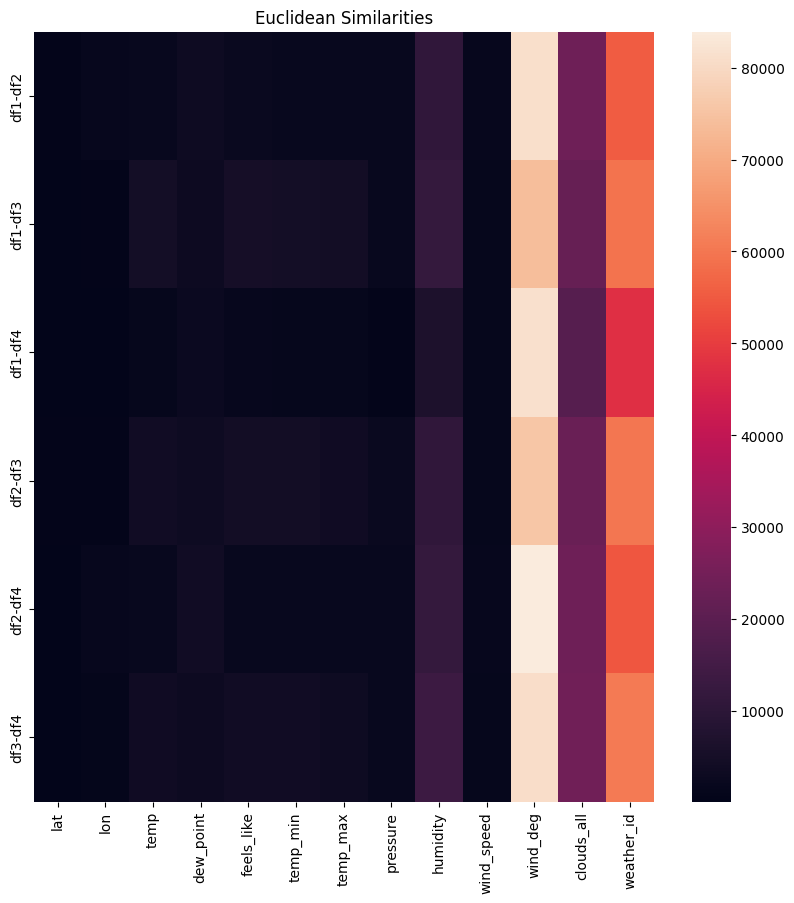

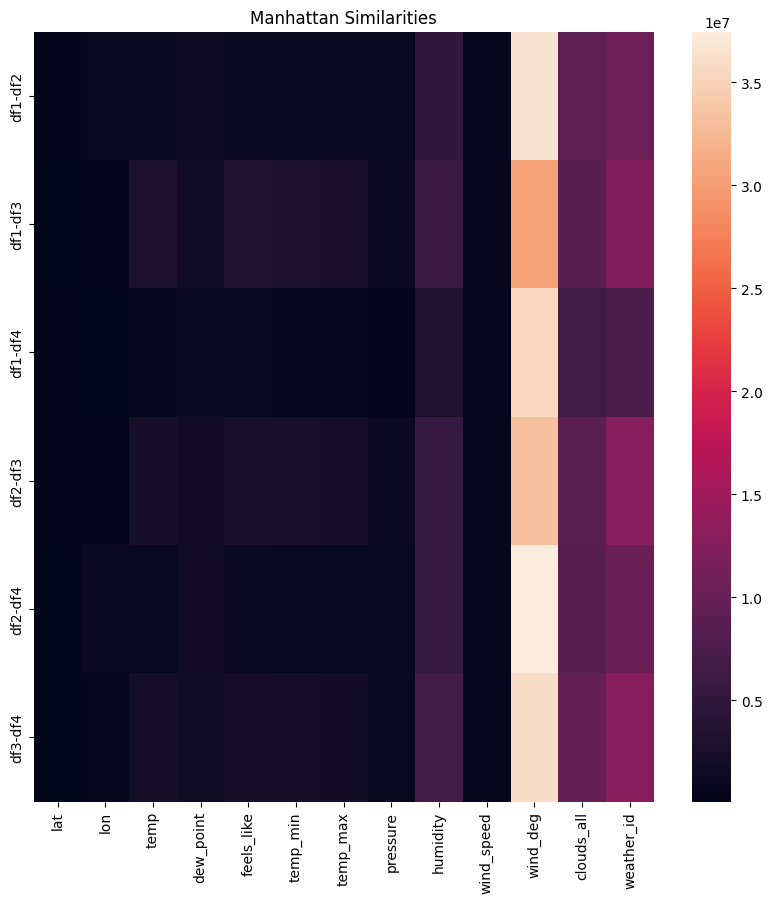

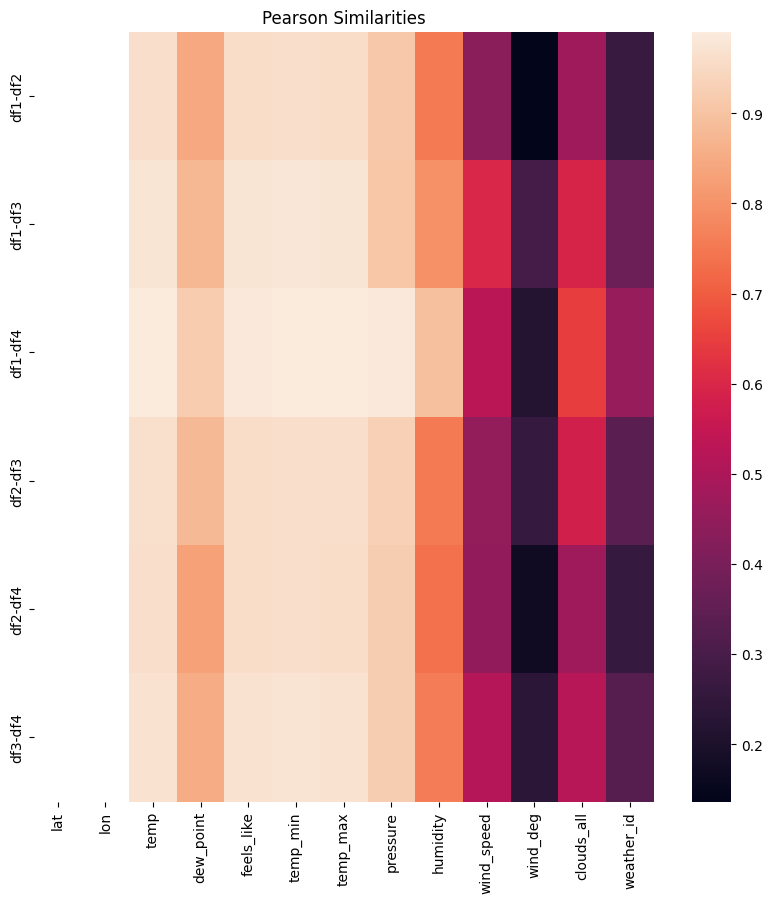

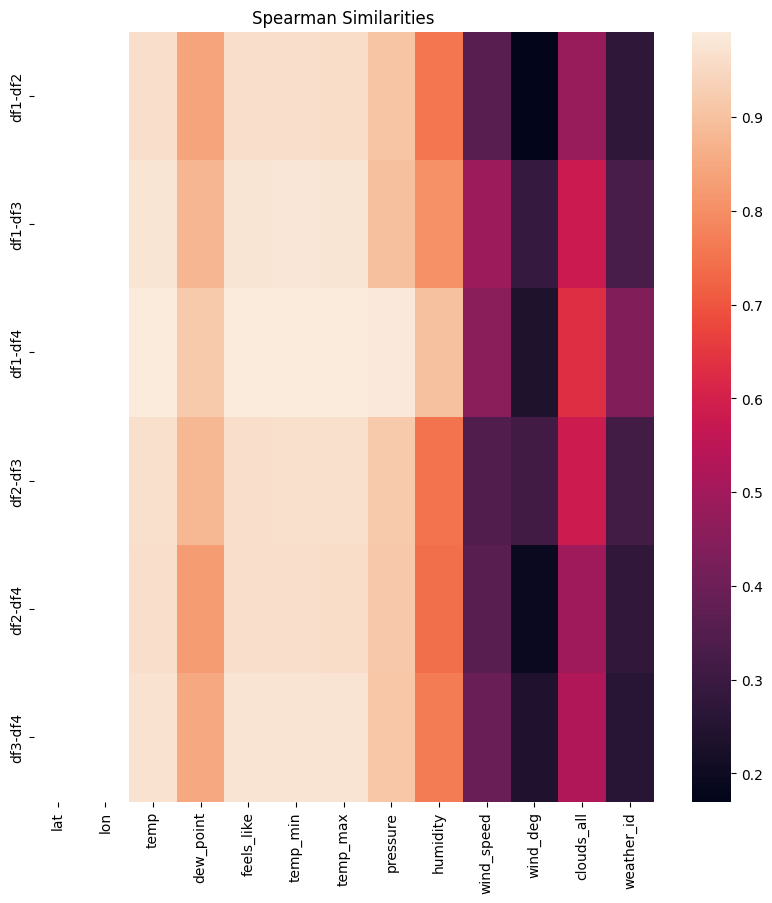

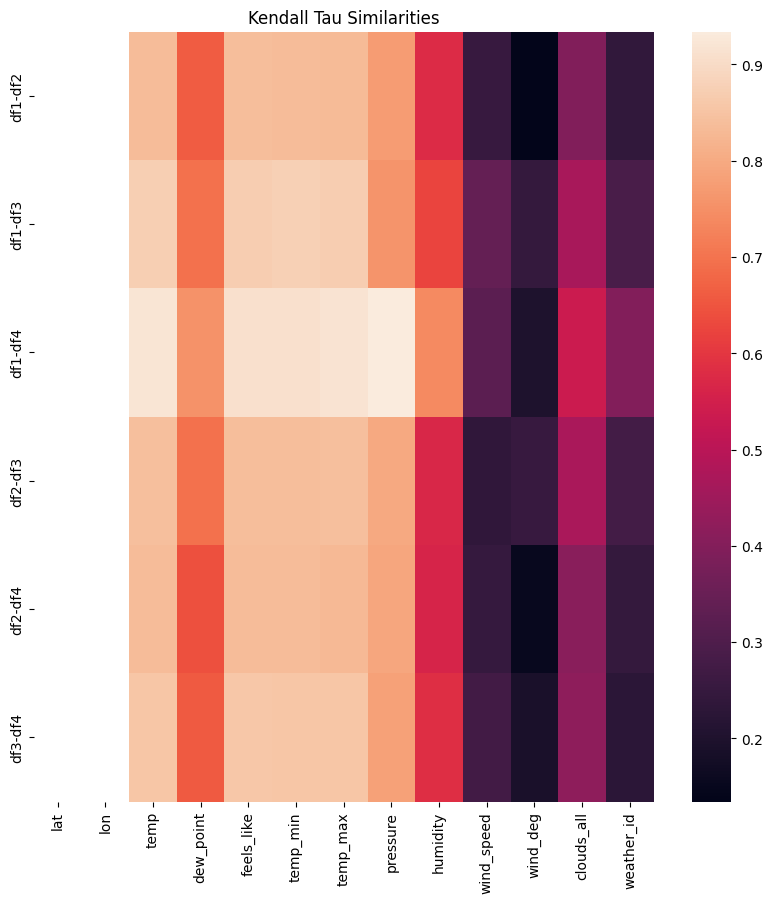

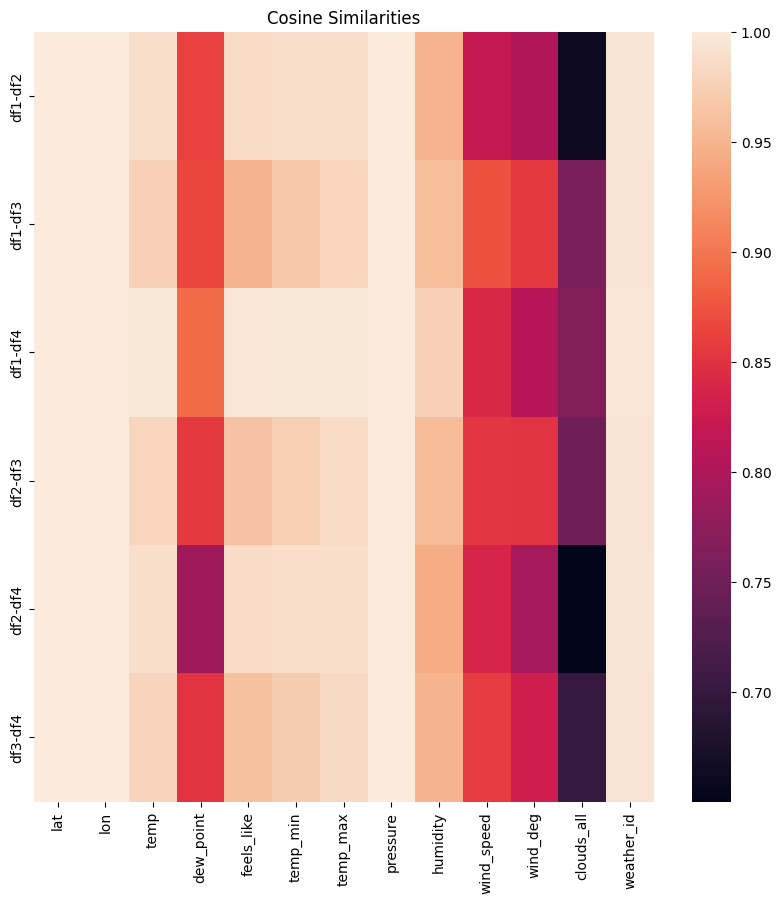

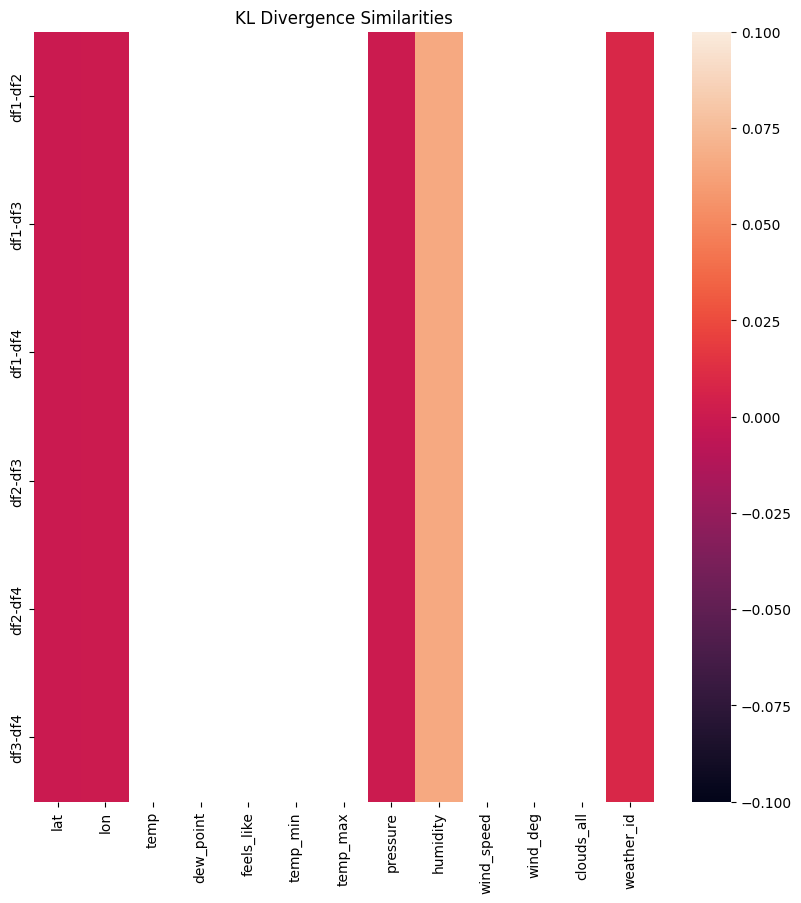

/Users/leifhuender/mambaforge/envs/interpolate/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/Users/leifhuender/mambaforge/envs/interpolate/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4921: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/Users/leifhuender/mambaforge/envs/interpolate/lib/python3.8/site-packages/scipy/stats/_stats_py.py:5283: RuntimeWarning: overflow encountered in scalar multiply
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


All files saved


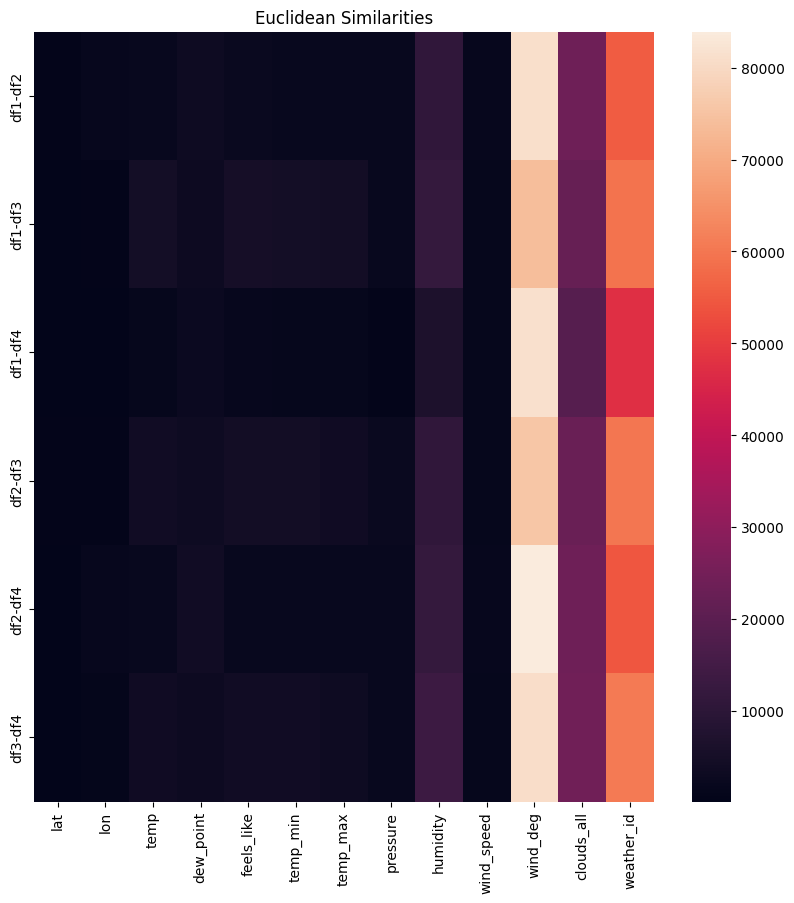

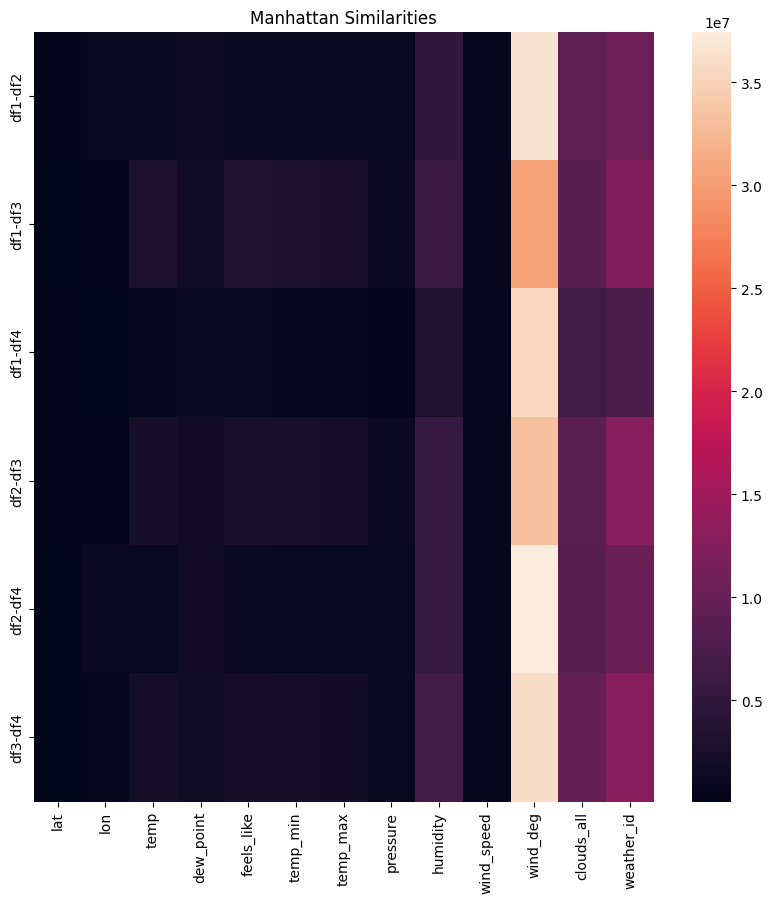

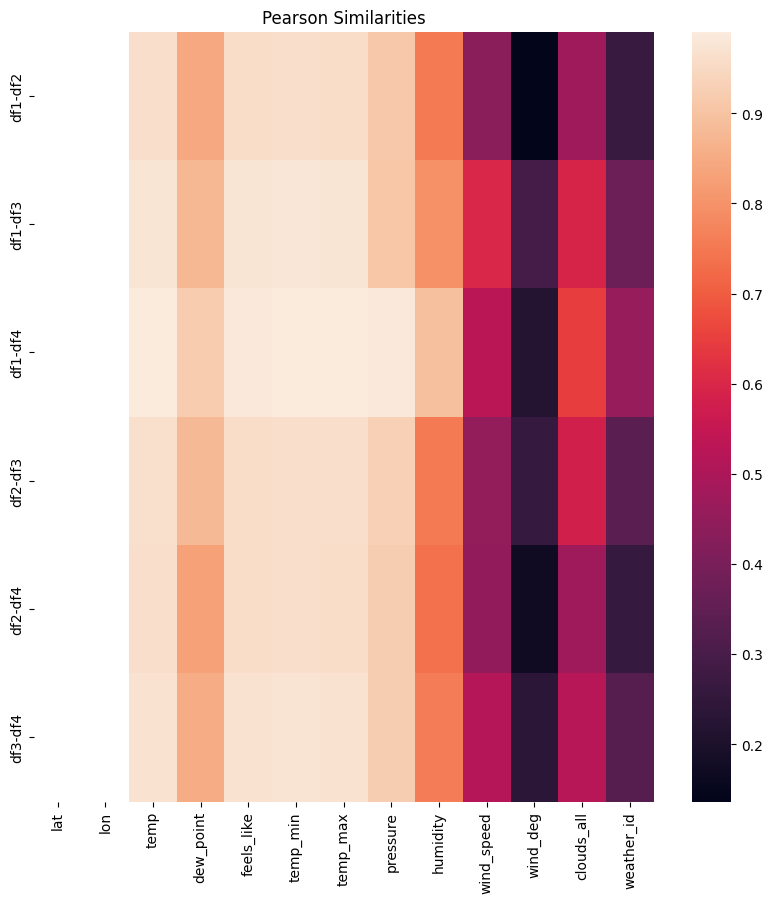

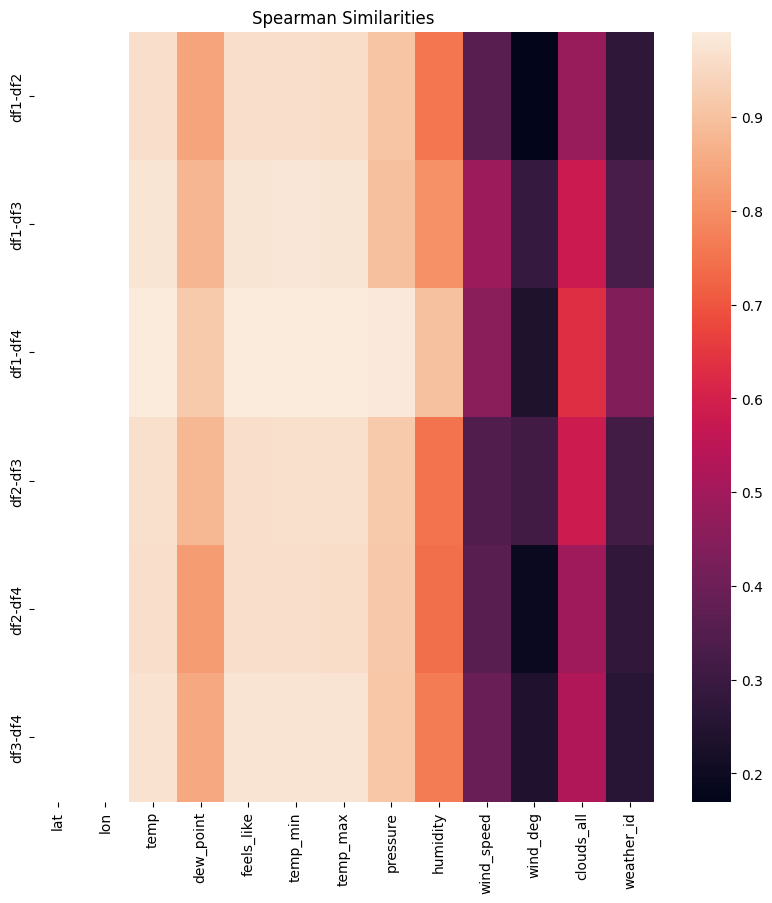

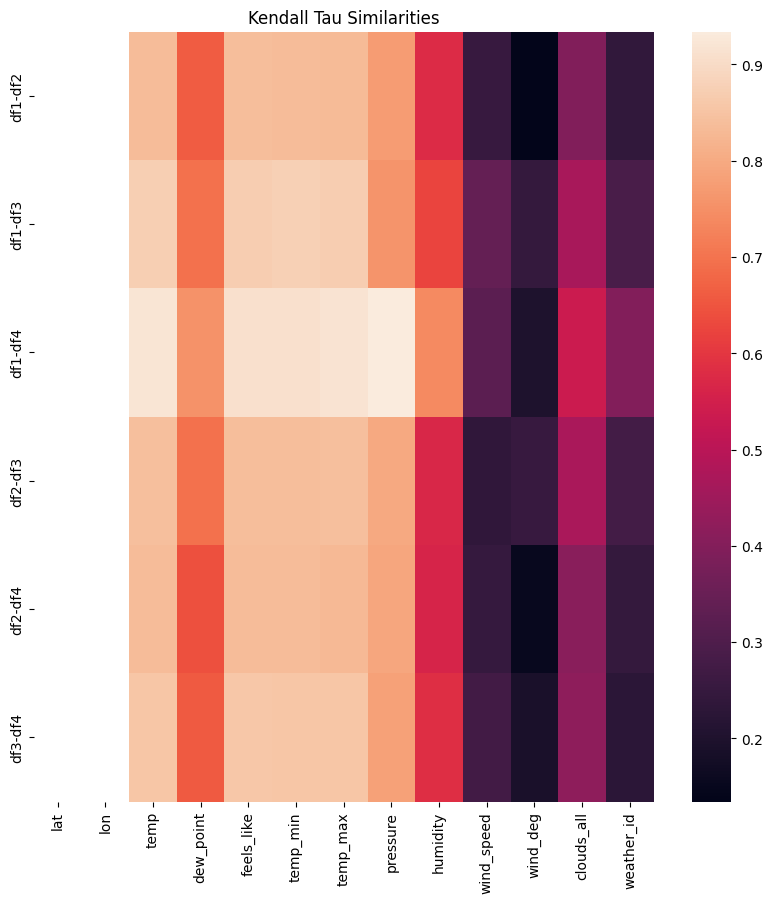

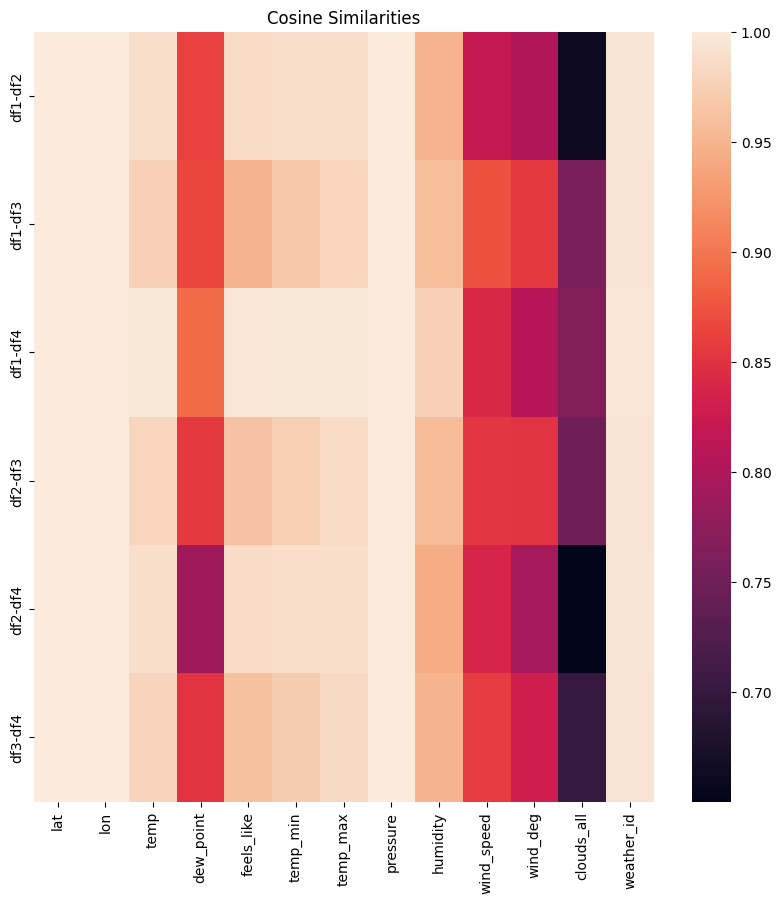

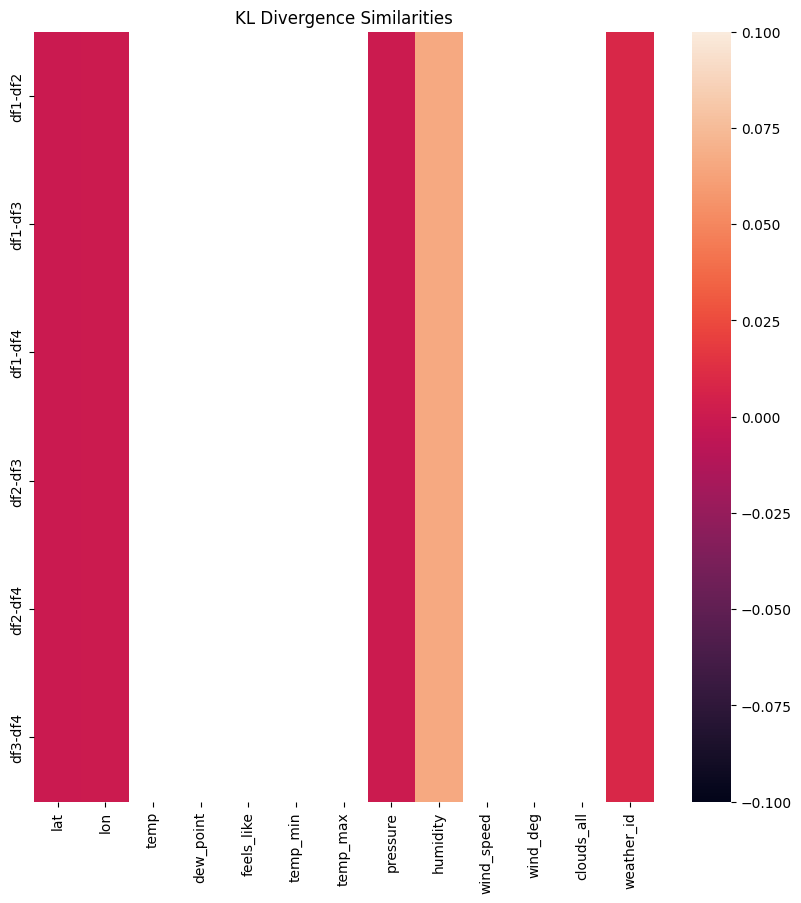

In [71]:
numeric_columns = ['lat', 'lon', 'temp', 'dew_point', 'feels_like', 'temp_min', 'temp_max', 'pressure', 'humidity', 'wind_speed', 'wind_deg', 'clouds_all', 'weather_id']
string_columns = ['weather_main', 'weather_description']

pecan_similarity_scores = Similarity(dona_ana_df, chaves_df, otero_df, sierra_df, numeric_columns, string_columns)

pecan_similarity_scores.show_all()
pecan_similarity_scores.save_all('../../data/similarity_scores/pecans_similarity/')

Dataframe Heads
DF1 Head:                           dt  ... weather_description
0  1979-01-01 00:00:00+00:00  ...        sky is clear
1  1979-01-01 01:00:00+00:00  ...        sky is clear
2  1979-01-01 02:00:00+00:00  ...        sky is clear
3  1979-01-01 03:00:00+00:00  ...        sky is clear
4  1979-01-01 04:00:00+00:00  ...        sky is clear

[5 rows x 17 columns]
DF2 Head:                           dt  ... weather_description
0  1979-01-01 00:00:00+00:00  ...        sky is clear
1  1979-01-01 01:00:00+00:00  ...        sky is clear
2  1979-01-01 02:00:00+00:00  ...        sky is clear
3  1979-01-01 03:00:00+00:00  ...        sky is clear
4  1979-01-01 04:00:00+00:00  ...        sky is clear

[5 rows x 17 columns]
DF3 Head:                           dt   city_name  ...  weather_main  weather_description
0  1979-01-01 00:00:00+00:00  Tamil Nadu  ...        Clouds      overcast clouds
1  1979-01-01 01:00:00+00:00  Tamil Nadu  ...        Clouds      overcast clouds
2  1979-01-01 02:

/Users/leifhuender/mambaforge/envs/interpolate/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/Users/leifhuender/mambaforge/envs/interpolate/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4921: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/Users/leifhuender/mambaforge/envs/interpolate/lib/python3.8/site-packages/scipy/stats/_stats_py.py:5283: RuntimeWarning: overflow encountered in scalar multiply
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


Euclidean Similarities
Column: lat
   df1-df2: 12.277383353142126
   df1-df3: 10882.672604224766
   df1-df4: 3709.028991454231
   df2-df3: 10870.395220871624
   df2-df4: 3696.751608101089
   df3-df4: 7173.6436127705365
Column: lon
   df1-df2: 12.906992755865872
   df1-df3: 145.81753767115958
   df1-df4: 2718.023791564751
   df2-df3: 158.72453042702546
   df2-df4: 2730.9307843206166
   df3-df4: 2572.206253893591
Column: temp
   df1-df2: 76.34899933856354
   df1-df3: 4209.650225280005
   df1-df4: 2995.4823324466456
   df2-df3: 4203.9838384204095
   df2-df4: 2973.9157143234575
   df3-df4: 2747.447000981092
Column: dew_point
   df1-df2: 233.9957437647105
   df1-df3: 4592.5143987144975
   df1-df4: 3084.2587472032897
   df2-df3: 4552.840473341891
   df2-df4: 3037.6507692294044
   df3-df4: 3457.2591007472956
Column: feels_like
   df1-df2: 164.2505242000768
   df1-df3: 5131.11494419098
   df1-df4: 3510.306232994494
   df2-df3: 5146.717212845486
   df2-df4: 3483.6754681944753
   df3-df4: 3971.0

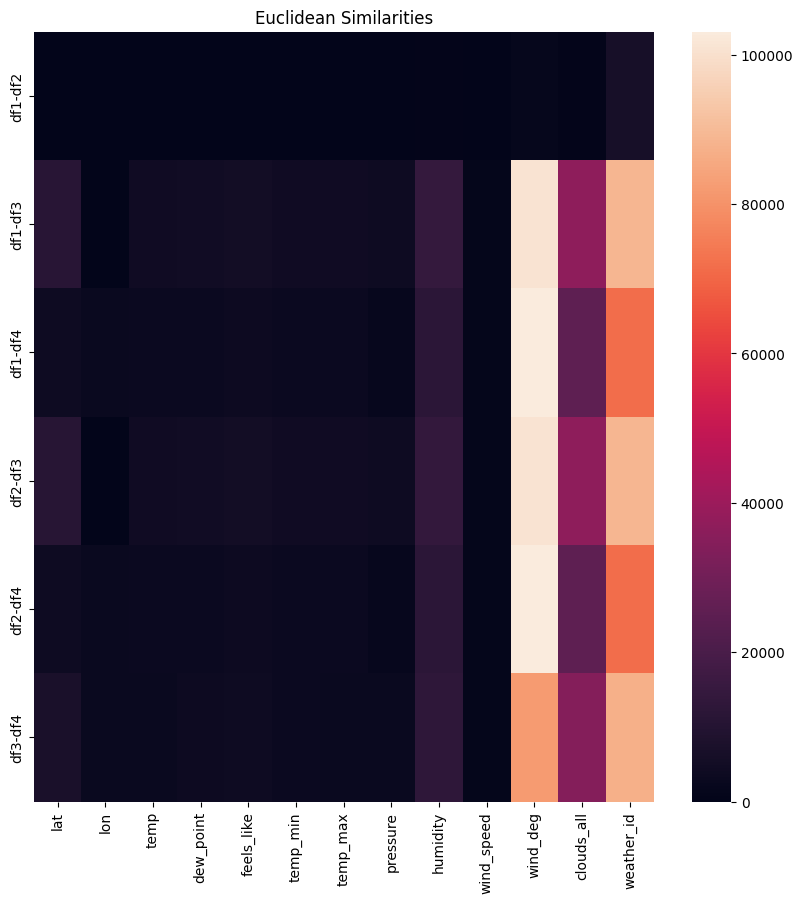

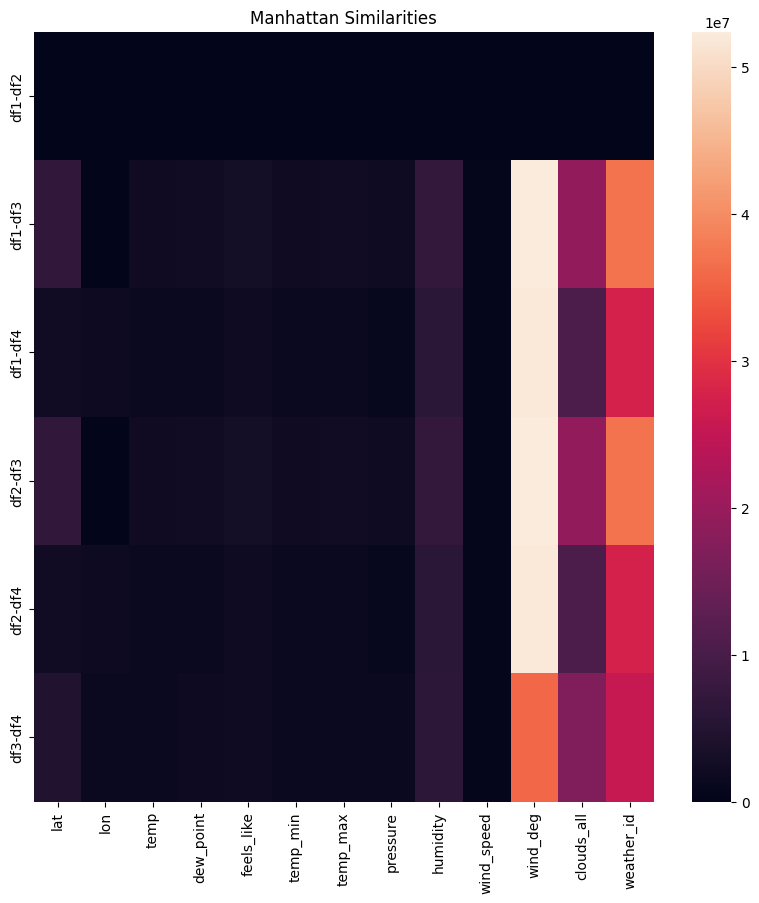

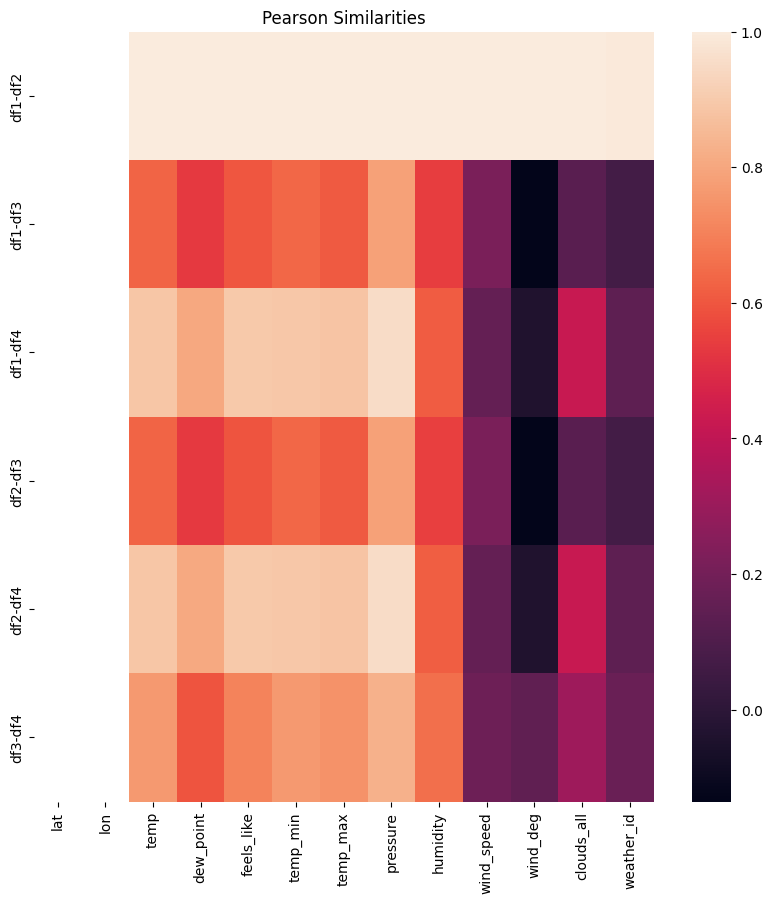

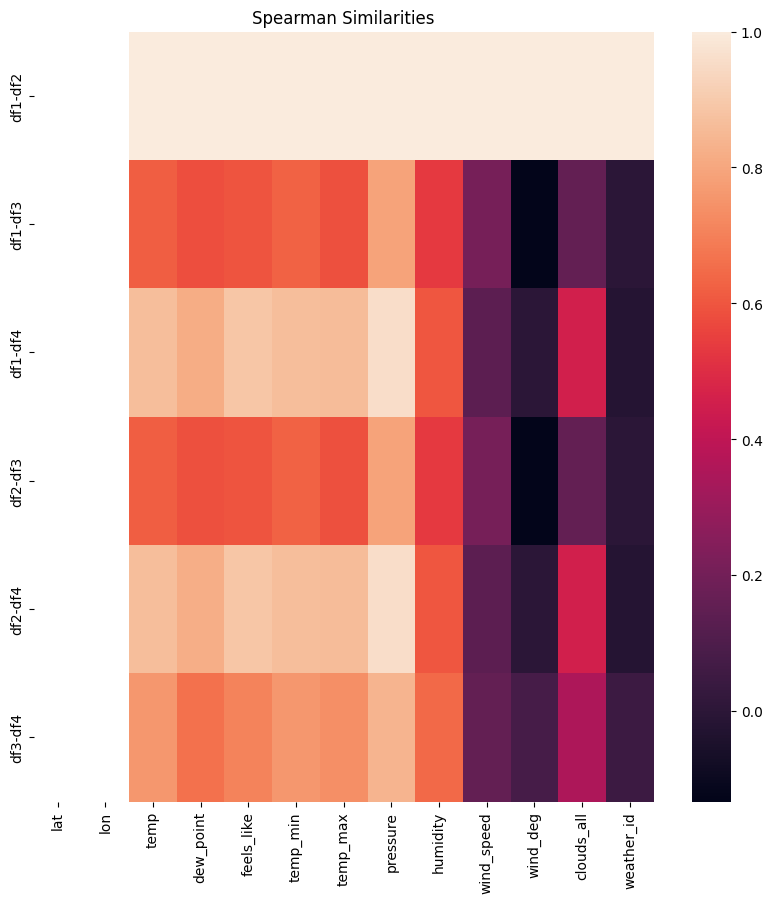

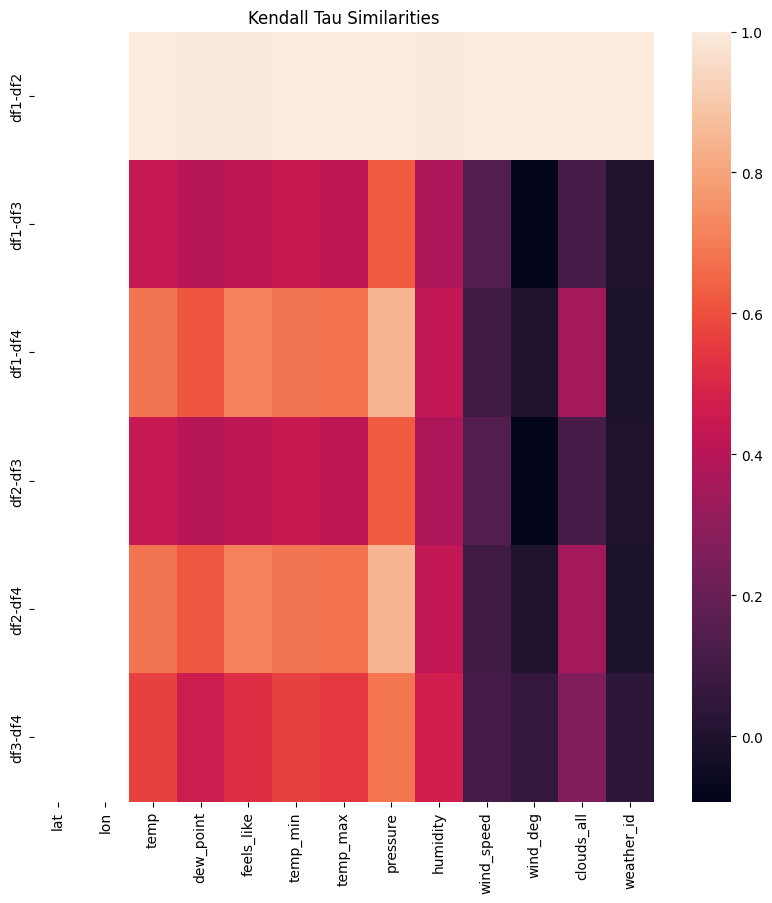

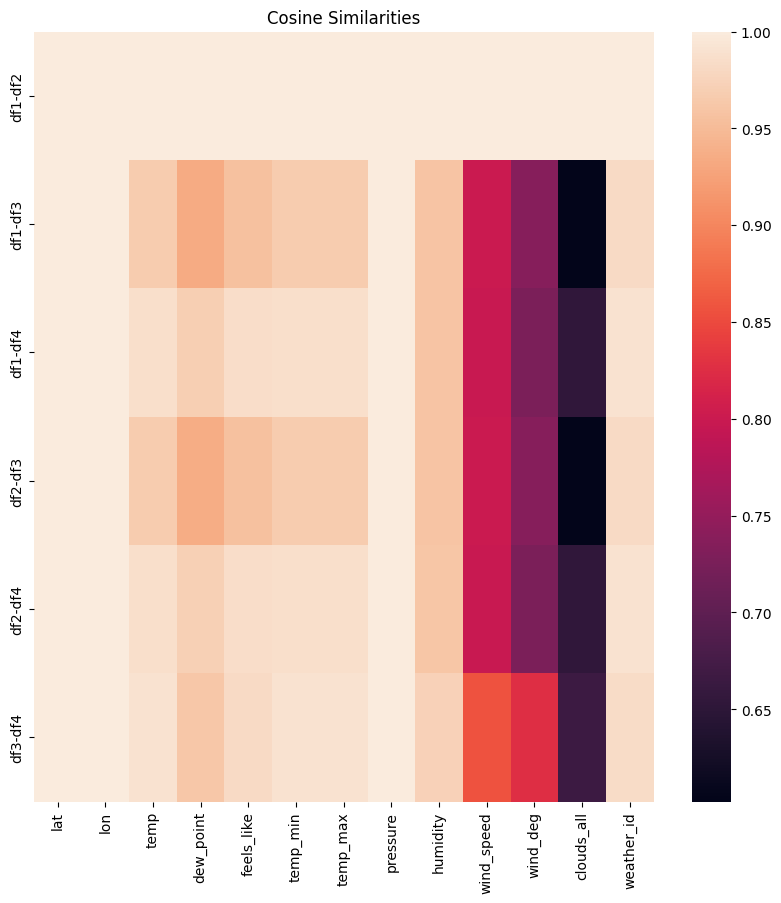

/Users/leifhuender/mambaforge/envs/interpolate/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/Users/leifhuender/mambaforge/envs/interpolate/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4921: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/Users/leifhuender/mambaforge/envs/interpolate/lib/python3.8/site-packages/scipy/stats/_stats_py.py:5283: RuntimeWarning: overflow encountered in scalar multiply
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


All files saved


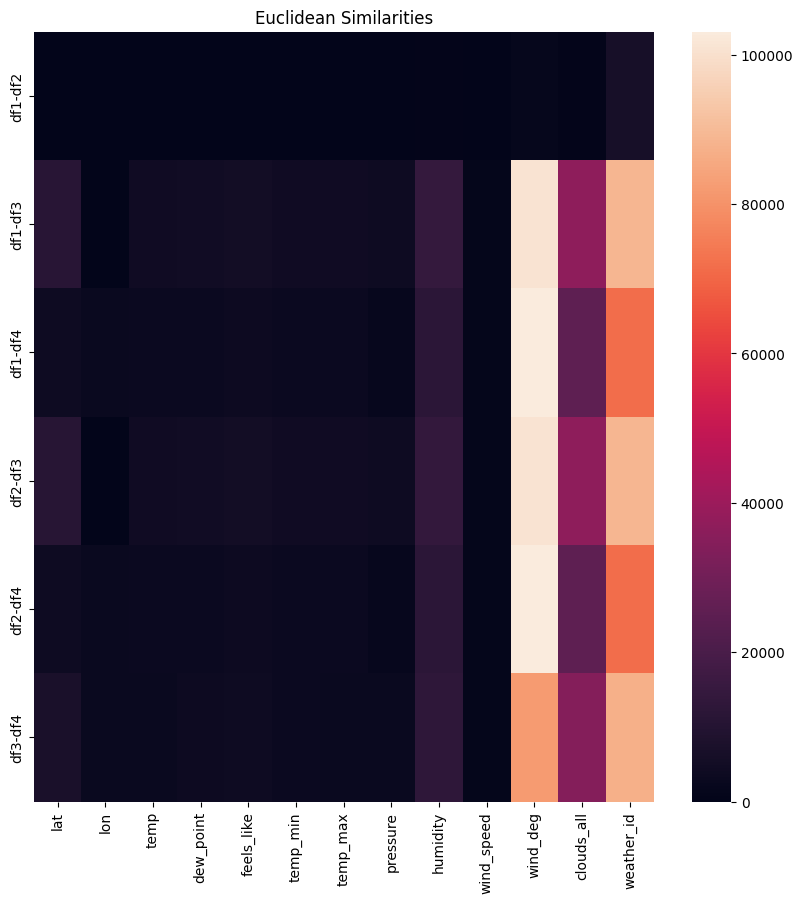

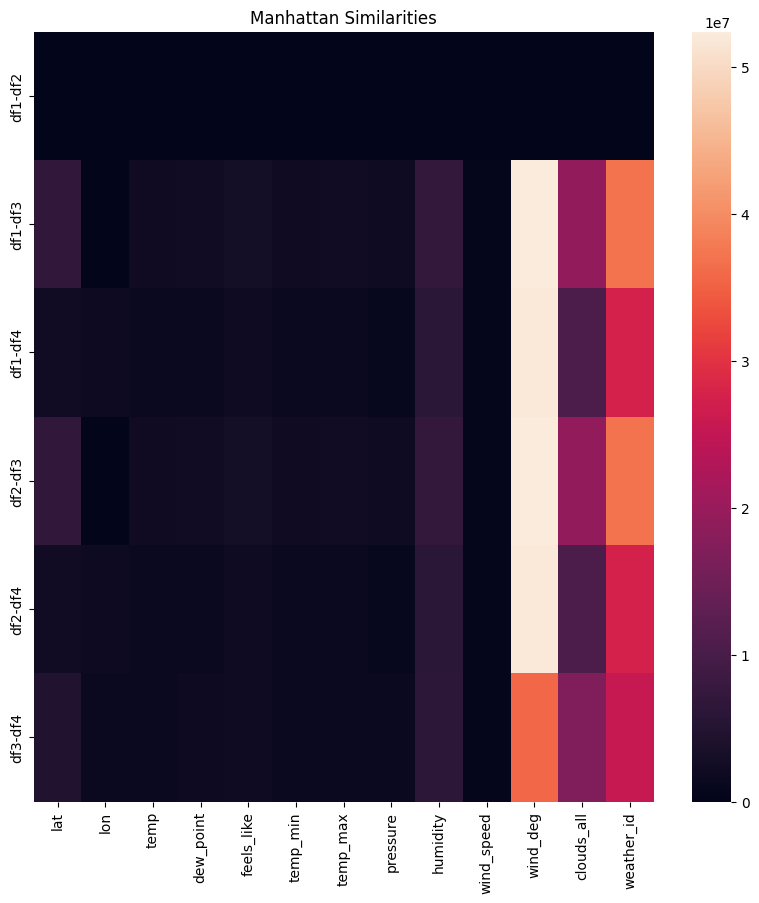

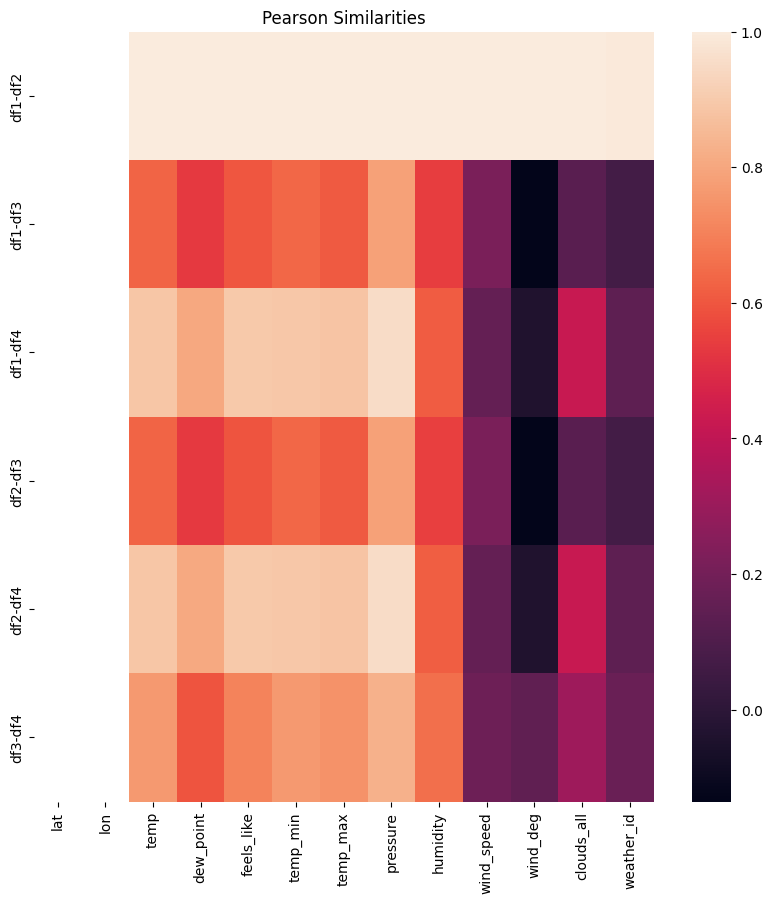

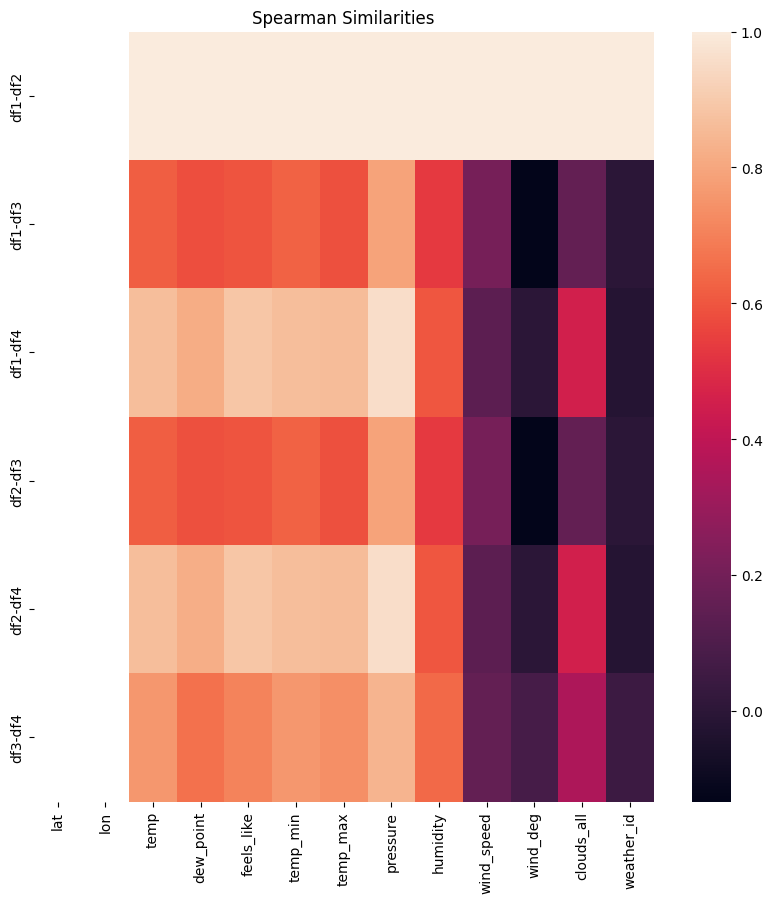

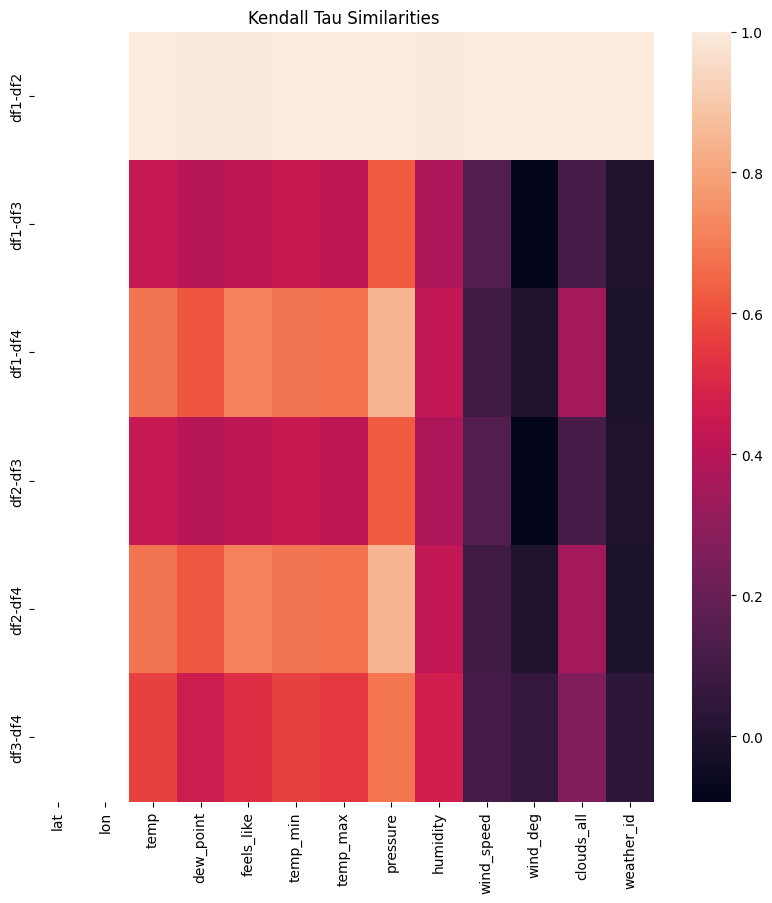

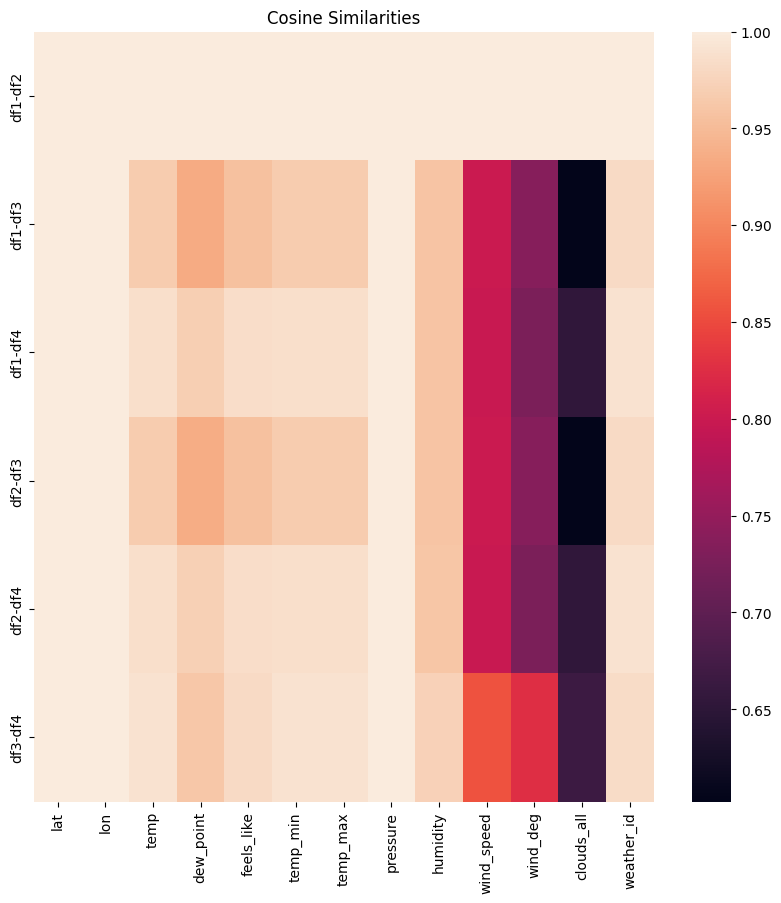

In [ ]:
similarity_scores = sim(north_new_delhi_df, south_new_delhi_df, tamil_nadu_df, gujarat_df, numeric_columns, string_columns)

similarity_scores.show_all()
similarity_scores.save_all('../../data/similarity_scores/malaria_similarity/')